In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully ")

data.head(10)

Data imported successfully 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.isnull().sum().head()

Hours     0
Scores    0
dtype: int64

In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


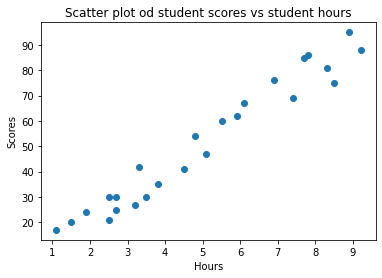

In [11]:
plt.scatter(x=data.Hours, y= data.Scores)
plt.xlabel("Hours")
plt.ylabel('Scores')
plt.title('Scatter plot od student scores vs student hours')
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

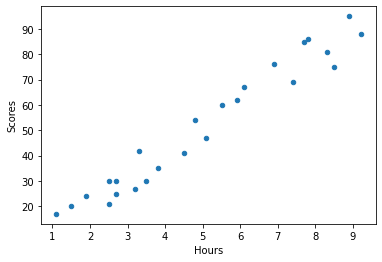

In [12]:
data.plot(kind="scatter",x='Hours',y='Scores',alpha=1)

array([[<AxesSubplot:xlabel='Hours', ylabel='Hours'>,
        <AxesSubplot:xlabel='Scores', ylabel='Hours'>],
       [<AxesSubplot:xlabel='Hours', ylabel='Scores'>,
        <AxesSubplot:xlabel='Scores', ylabel='Scores'>]], dtype=object)

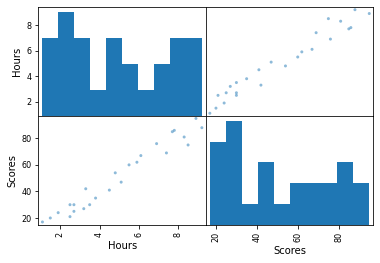

In [13]:
from pandas.plotting import scatter_matrix
attributes =['Hours','Scores']
scatter_matrix(data[attributes ],)

In [14]:
data.mean()
data1 = data.fillna(data.mean())
data1.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
corr_matrix =data.corr()
corr_matrix['Scores'].sort_values(ascending =False)

Scores    1.000000
Hours     0.976191
Name: Scores, dtype: float64

In [18]:
x = data1.drop('Scores',axis ='columns')
y = data1.drop('Hours', axis ='columns')
print(f"shape of x is{x.shape} \nshape of y is {y.shape}")

shape of x is(25, 1) 
shape of y is (25, 1)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state = 51)
print('x_train = ',len(x_train))
print('x_test = ',len(x_test))
print('y_train = ',len(y_train))
print('y_test = ',len(y_test))

x_train =  20
x_test =  5
y_train =  20
y_test =  5


In [21]:
# y = m*x+c
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [22]:
lr_model.fit(x_train, y_train)
x_pre = lr_model.predict(x_test)
lr_model.score(x_test,y_test)

0.9238518102278781

In [23]:
dataframe = pd.DataFrame(np.c_[x_test, y_test,x_pre], columns = ['study_hours','Score','Score_predicted'])
dataframe

,study_hours,Score,Score_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


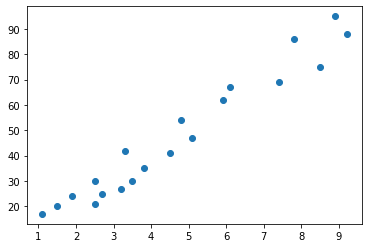

In [24]:
plt.scatter(x_train,y_train)

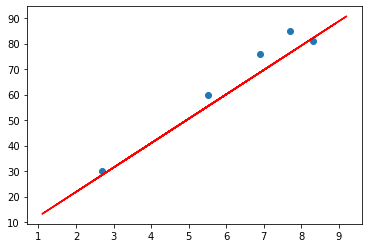

In [25]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr_model.predict(x_train), color = 'r')

In [26]:
import joblib
joblib.dump(lr_model ,'Student_marks_predictor_model.pkl')

['Student_marks_predictor_model.pkl']

In [27]:
model = joblib.load('Student_marks_predictor_model.pkl')
model

LinearRegression()

In [28]:
model.predict([[5]])

array([[50.52365786]])